In [19]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 18 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (19.5 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120895 files and direc

In [1]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

## 단변량 분석

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('/content/drive/MyDrive/insurance_eda/customer_data_.csv', encoding='cp949')

In [4]:
# 지표를 쉽게 보기 위함

# AGE컬럼 매핑
age_mapping = {1: '20대', 2:'30대', 3:'40대', 4:'50대', 5:'60대', 6:'70대'}
data['AGE'] = data['AGE'].map(age_mapping)

# 성별컬럼 매핑
gender_mapping = {0: '여성', 1:'남성'}
data['성별'] = data['성별'].map(gender_mapping)

# 갱신컬럼 매핑
renewal_mapping = {0: '비갱신', 1:'갱신'}
data['갱신'] = data['갱신'].map(renewal_mapping)

In [5]:
print(data['성별'].unique())
print(data['갱신'].unique())

['남성' '여성']
['비갱신' '갱신']


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   clust                    12000 non-null  int64  
 1   AGE                      12000 non-null  object 
 2   등록(계/피)                  12000 non-null  object 
 3   고용상태                     12000 non-null  object 
 4   성별                       12000 non-null  object 
 5   Willingness to pay/Stay  12000 non-null  float64
 6   갱신                       12000 non-null  object 
 7   상품타입                     12000 non-null  object 
 8   교육수준                     12000 non-null  object 
 9   소득                       12000 non-null  int64  
 10  지역                       12000 non-null  object 
 11  결혼여부                     12000 non-null  object 
 12  월 납입액                    12000 non-null  int64  
 13  VOC                      12000 non-null  int64  
 14  타 상품 보유 현황            

In [13]:
# 단변량 분석 함수 정의
def eda(feature_name):
  if data[feature_name].dtype == 'object':
    # 명목형 변수: countplot 출력
    plt.figure(figsize=(8, 4))
    sns.countplot(data=data, x=feature_name)
    plt.xlabel(feature_name)
    plt.ylabel('개수')
    plt.title(f'{feature_name} 분포')
  else:
    # 수치형변수: 히스토그램, box plot
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(data[feature_name], kde=True)
    plt.xlabel(feature_name)
    plt.ylabel('빈도수')
    plt.title(f'{feature_name} 분포')

    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[feature_name])
    plt.xlabel(feature_name)
    plt.title(f'{feature_name} 박스플롯')

  plt.tight_layout()
  plt.show()

In [11]:
variables = list(data.columns)
variables.pop(0)
print(variables)

['AGE', '등록(계/피)', '고용상태', '성별', 'Willingness to pay/Stay', '갱신', '상품타입', '교육수준', '소득', '지역', '결혼여부', '월 납입액', 'VOC', '타 상품 보유 현황', '온라인방문빈도', '갱신인센티브', '판매채널', '총지불금액', '자동차', '거주지사이즈']


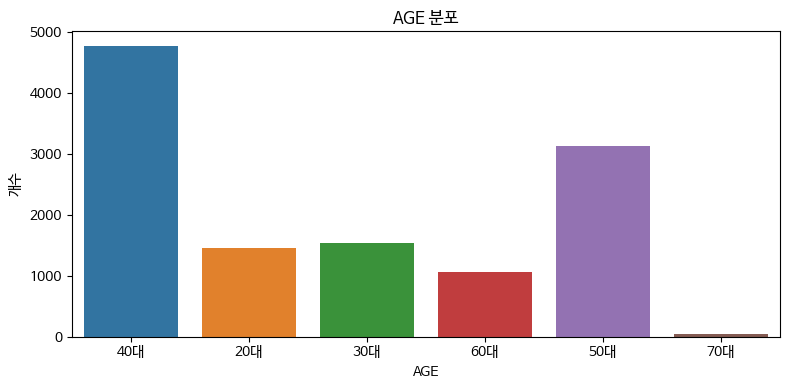

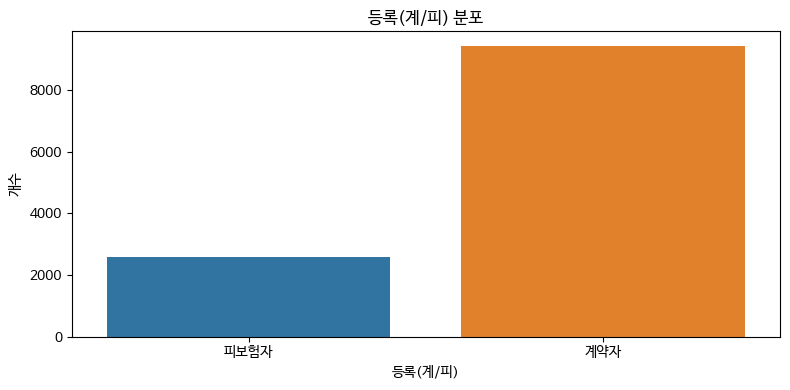

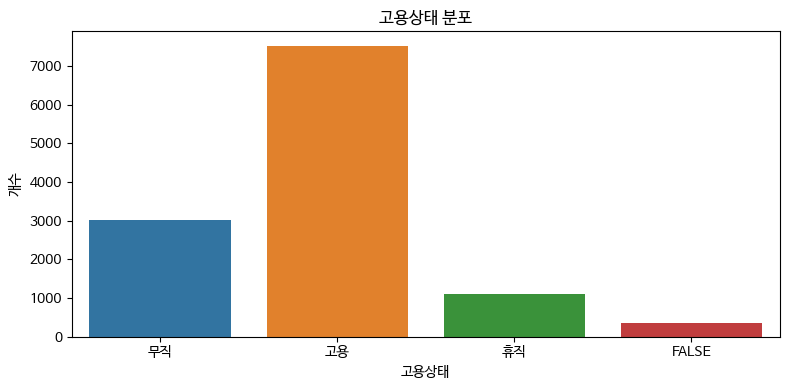

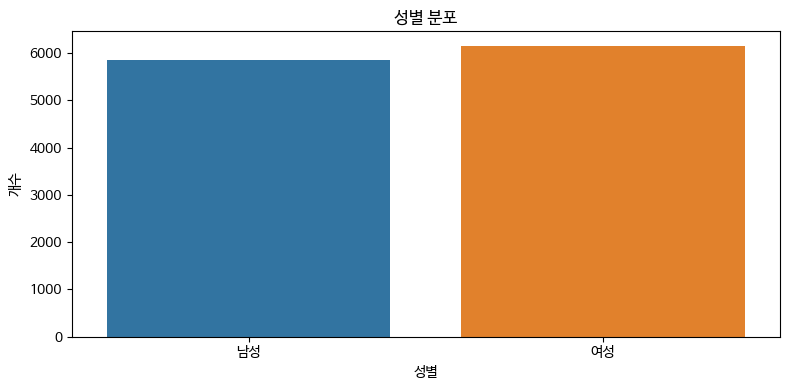

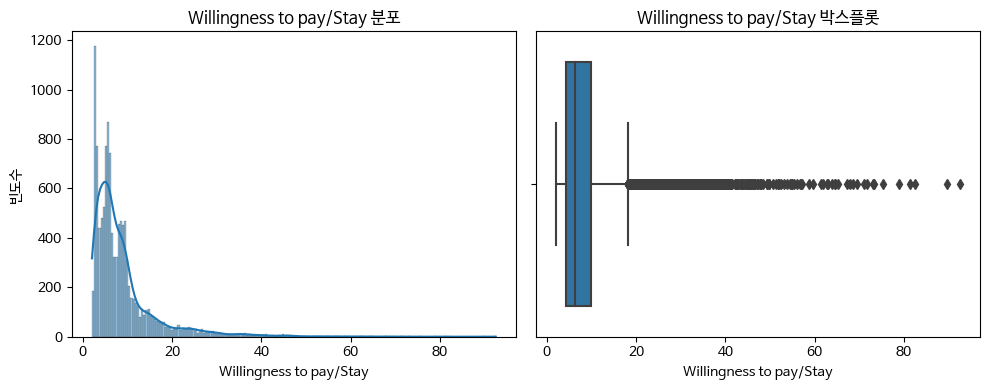

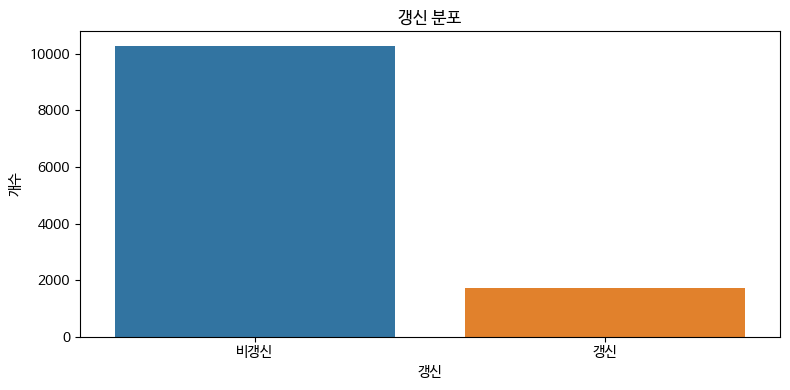

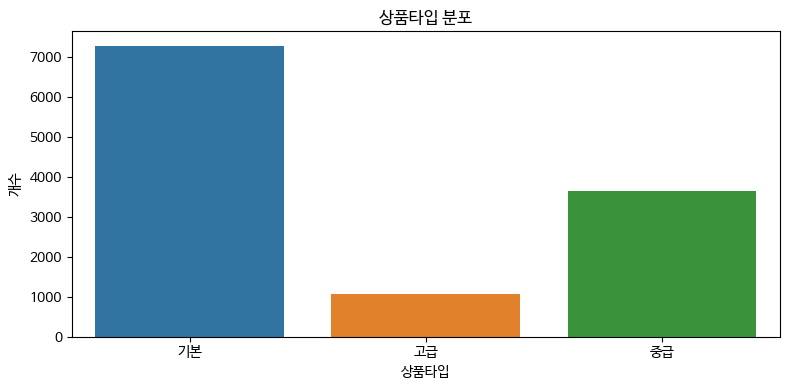

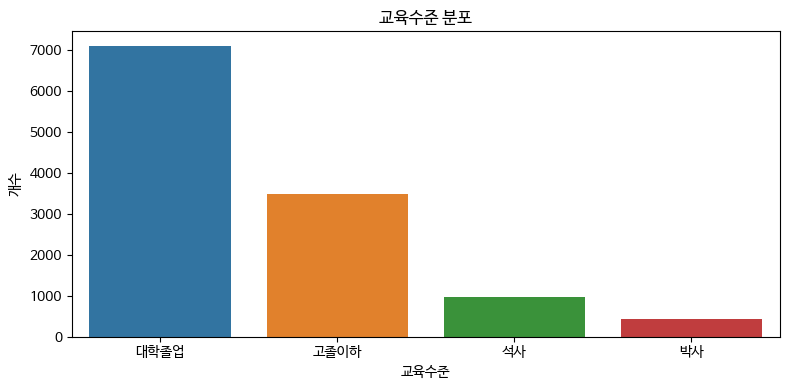

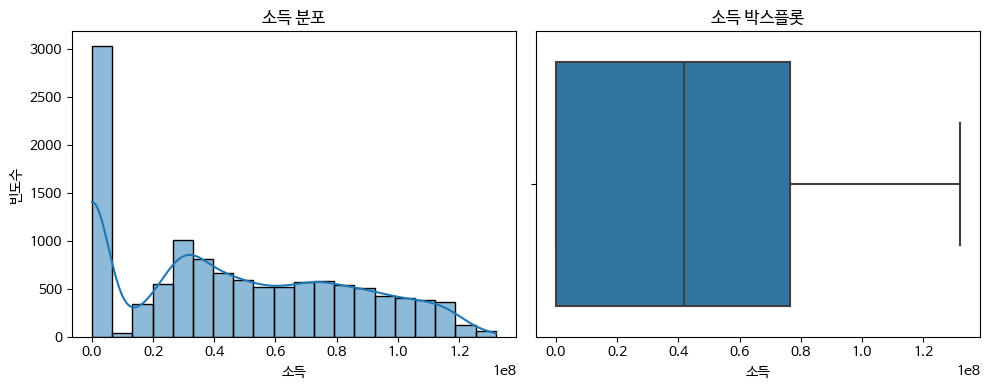

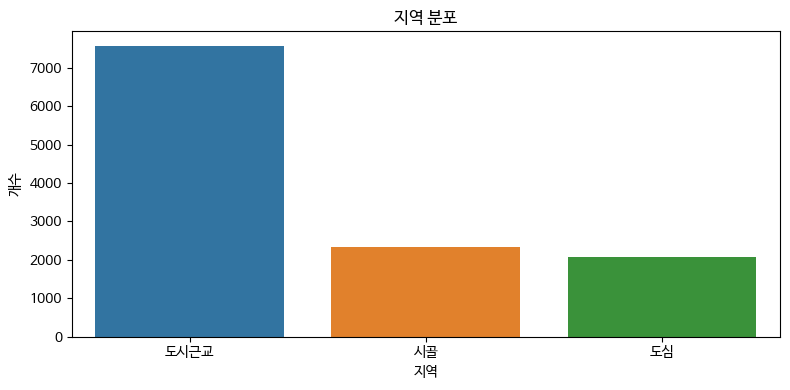

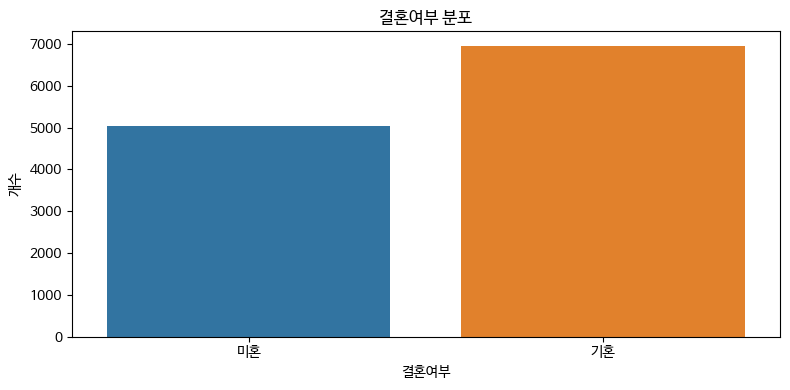

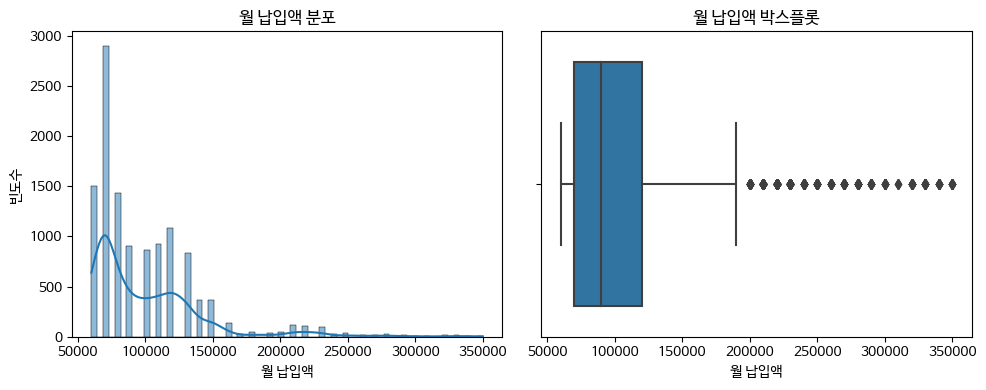

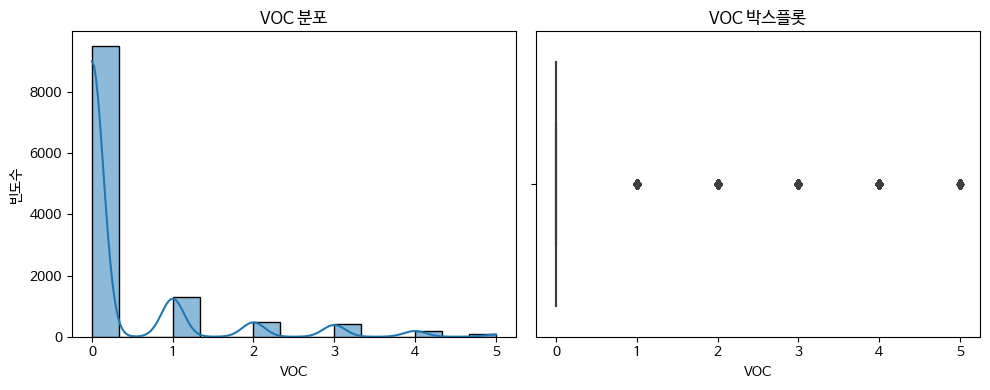

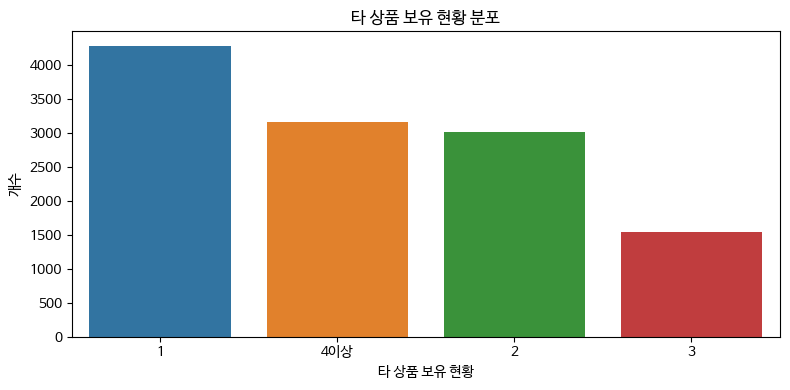

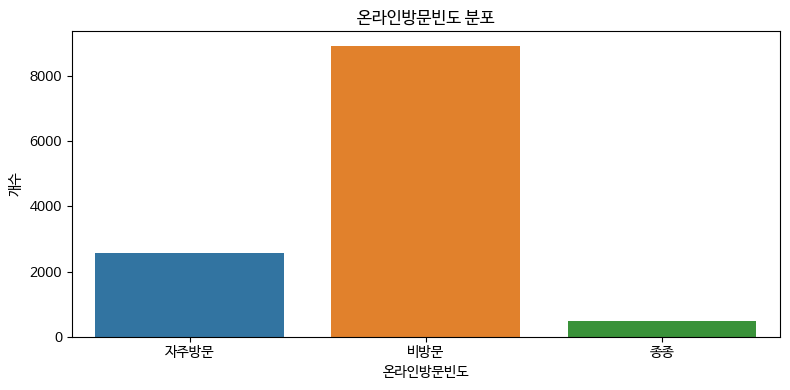

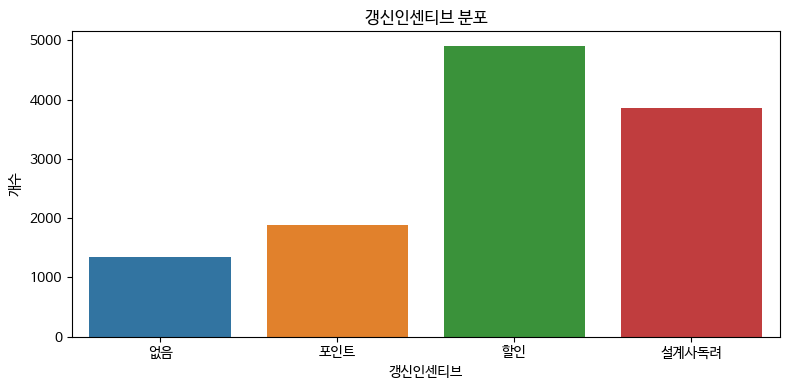

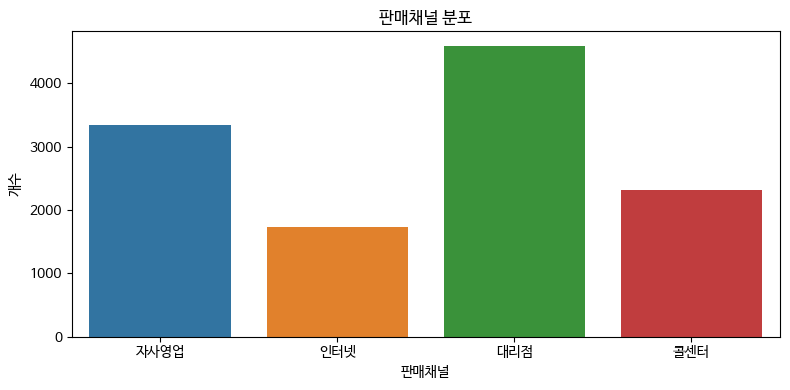

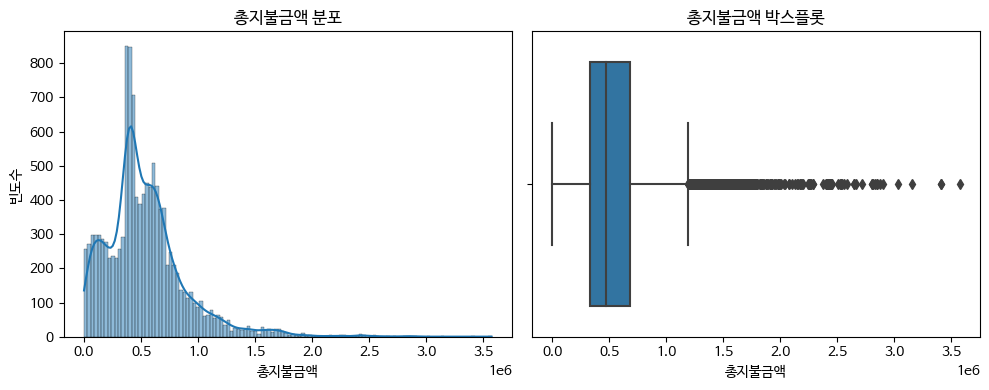

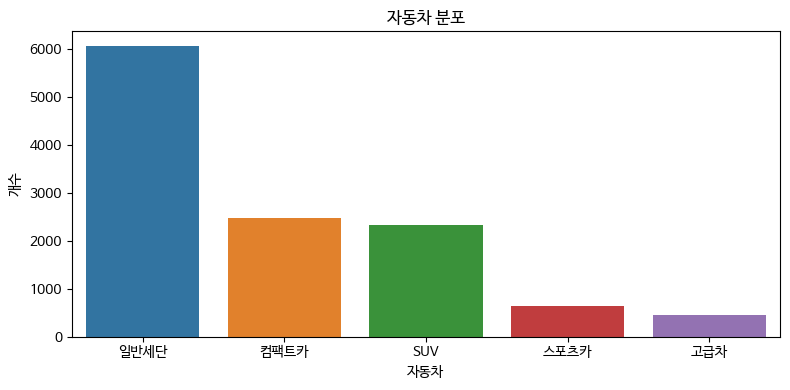

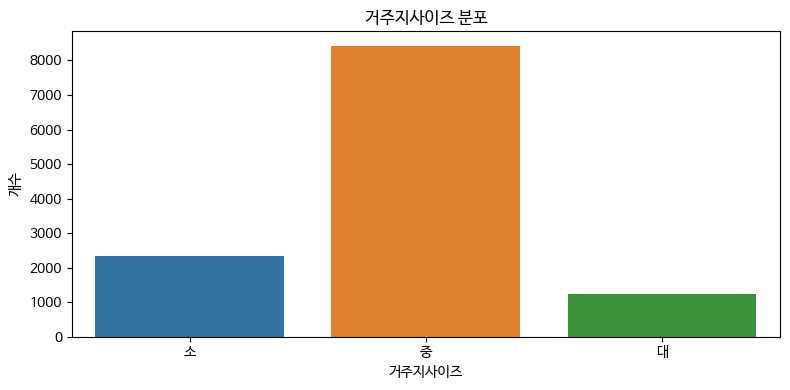

In [14]:
for variable in variables:
  eda(variable)

Missing Values: 


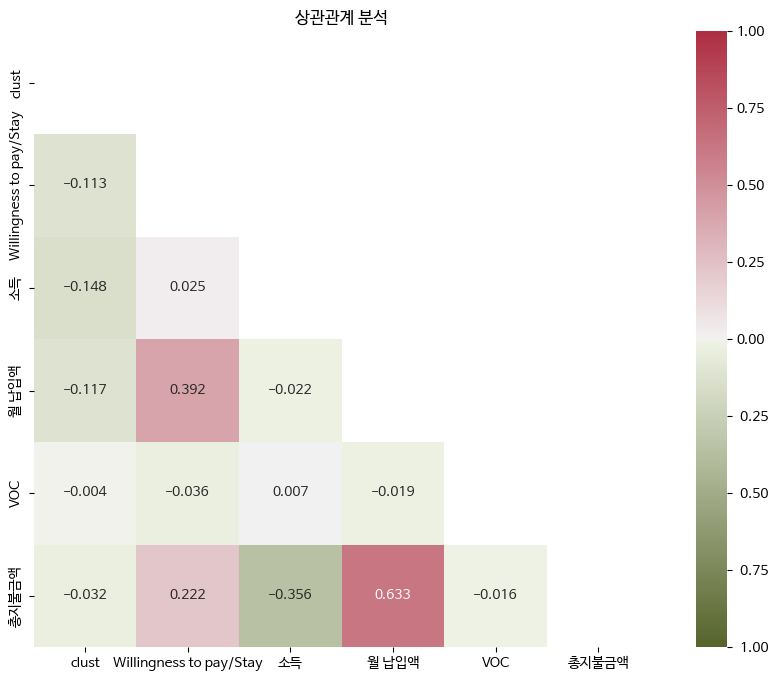

In [28]:
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# 결측치 확인
missing_values = data.isnull().sum()
print('Missing Values: ')

# 상관분석 시각화
df = data.corr()
plt.figure(figsize=(12, 8))
mask = np.triu(np.ones_like(df, dtype=bool))
cmap = sns.diverging_palette(100, 7, s=75, l=40, n=5, center="light", as_cmap=True)
sns.heatmap(df,
            annot = True,
            mask = mask,
            fmt = '.3f',
            cmap = cmap,
            vmin = -1, vmax = 1,
            square=True)
plt.title("상관관계 분석")
plt.show()

Willingness to pay/Stay의 이상치 인덱스
[12, 22, 26, 39, 43, 61, 87, 96, 106, 108, 111, 132, 138, 140, 150, 166, 177, 182, 184, 198, 200, 214, 231, 232, 237, 248, 250, 258, 264, 268, 274, 281, 312, 313, 314, 319, 322, 345, 348, 349, 373, 374, 383, 396, 405, 406, 432, 435, 437, 438, 458, 487, 498, 504, 506, 537, 548, 556, 595, 610, 621, 628, 631, 649, 651, 659, 695, 714, 718, 720, 725, 748, 759, 767, 769, 770, 783, 786, 789, 796, 802, 806, 826, 829, 831, 849, 874, 901, 913, 914, 917, 934, 939, 946, 961, 974, 986, 987, 989, 993, 994, 1010, 1015, 1017, 1027, 1030, 1043, 1104, 1108, 1109, 1113, 1152, 1160, 1166, 1179, 1184, 1191, 1200, 1205, 1210, 1215, 1231, 1251, 1253, 1254, 1260, 1269, 1312, 1318, 1321, 1331, 1337, 1345, 1346, 1382, 1389, 1391, 1418, 1447, 1450, 1463, 1466, 1476, 1477, 1485, 1493, 1507, 1526, 1554, 1556, 1562, 1570, 1571, 1581, 1586, 1598, 1607, 1608, 1609, 1634, 1661, 1688, 1695, 1696, 1723, 1736, 1751, 1780, 1795, 1798, 1819, 1832, 1838, 1848, 1860, 1861, 1863, 1874, 1879, 1

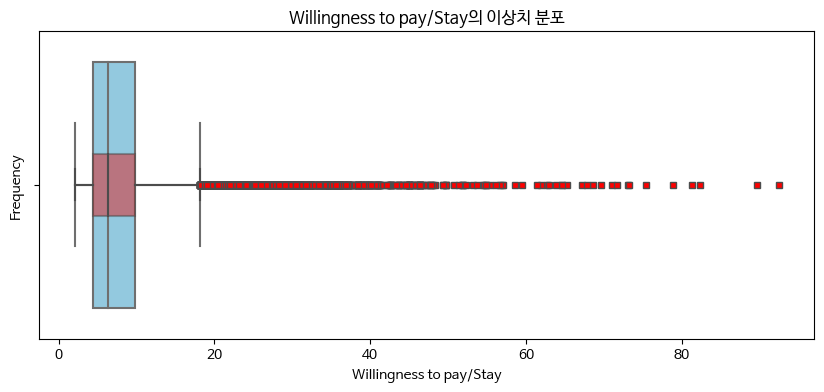

소득의 이상치 인덱스
[]


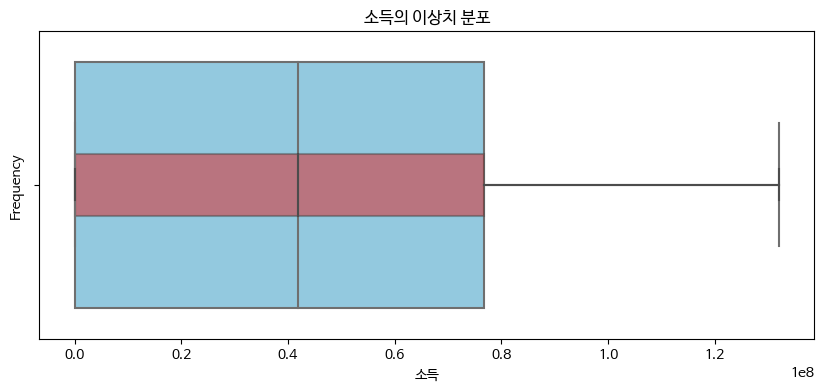

월 납입액의 이상치 인덱스
[20, 45, 64, 76, 94, 96, 135, 150, 197, 205, 217, 218, 266, 281, 348, 374, 378, 383, 435, 439, 450, 473, 487, 506, 542, 556, 595, 603, 621, 647, 653, 661, 663, 701, 718, 725, 731, 763, 770, 775, 788, 829, 835, 862, 886, 908, 936, 986, 1015, 1044, 1045, 1074, 1086, 1157, 1177, 1179, 1184, 1202, 1210, 1235, 1236, 1240, 1251, 1254, 1256, 1264, 1293, 1302, 1409, 1457, 1463, 1492, 1518, 1542, 1556, 1583, 1586, 1601, 1628, 1656, 1695, 1722, 1775, 1780, 1832, 1859, 1874, 1907, 1915, 1924, 1930, 1947, 1957, 1964, 1965, 1973, 1996, 2025, 2053, 2106, 2129, 2138, 2180, 2182, 2221, 2225, 2252, 2285, 2288, 2305, 2343, 2367, 2368, 2382, 2389, 2407, 2432, 2433, 2452, 2457, 2459, 2529, 2582, 2597, 2717, 2725, 2730, 2743, 2758, 2818, 2837, 2862, 2897, 2911, 2945, 2989, 3009, 3047, 3062, 3073, 3114, 3158, 3270, 3275, 3276, 3284, 3291, 3295, 3301, 3362, 3376, 3385, 3388, 3407, 3447, 3475, 3499, 3502, 3621, 3623, 3626, 3641, 3676, 3683, 3698, 3706, 3737, 3754, 3767, 3792, 3810, 3836, 3844, 

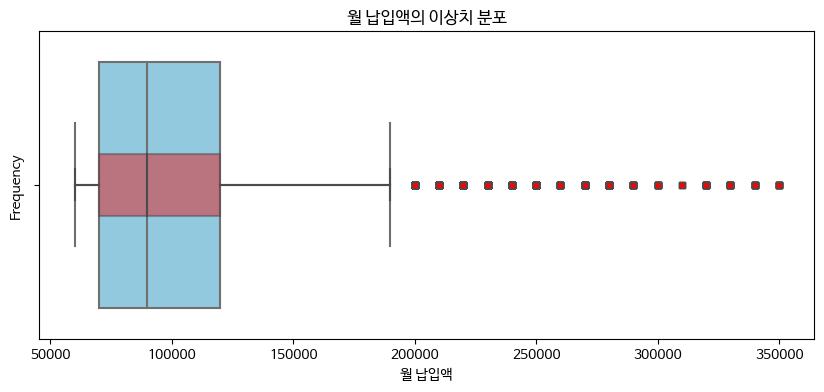

VOC의 이상치 인덱스
[1, 8, 10, 11, 18, 26, 29, 33, 34, 56, 64, 72, 79, 91, 92, 93, 94, 95, 97, 100, 108, 112, 117, 120, 121, 122, 125, 132, 133, 134, 135, 137, 141, 146, 150, 155, 156, 159, 160, 163, 164, 165, 167, 168, 170, 172, 180, 181, 182, 183, 199, 209, 218, 225, 230, 231, 233, 245, 259, 261, 293, 295, 305, 307, 313, 318, 320, 322, 328, 340, 355, 363, 368, 369, 372, 373, 377, 391, 395, 397, 418, 420, 430, 435, 441, 444, 451, 456, 457, 459, 473, 477, 480, 483, 489, 490, 493, 494, 503, 505, 509, 511, 512, 522, 523, 528, 529, 538, 547, 554, 555, 557, 558, 560, 561, 564, 565, 566, 568, 573, 574, 575, 580, 588, 596, 597, 604, 613, 617, 618, 619, 620, 627, 628, 631, 632, 658, 671, 674, 679, 681, 688, 693, 697, 700, 708, 711, 714, 724, 726, 727, 730, 731, 732, 733, 735, 746, 748, 749, 751, 756, 759, 760, 761, 770, 772, 781, 782, 786, 790, 797, 800, 805, 810, 811, 814, 825, 826, 827, 828, 831, 836, 837, 839, 840, 849, 862, 872, 873, 874, 879, 884, 894, 903, 904, 906, 909, 916, 917, 920, 927, 92

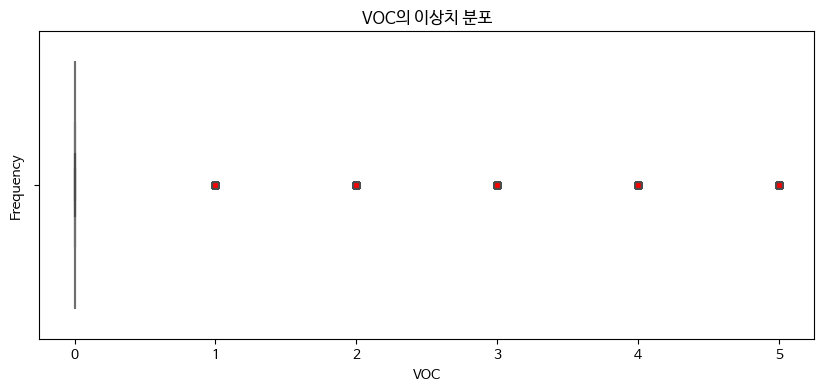

총지불금액의 이상치 인덱스
[3, 26, 30, 59, 65, 75, 76, 79, 135, 138, 197, 217, 218, 220, 228, 252, 266, 276, 281, 348, 367, 374, 376, 378, 392, 410, 440, 487, 510, 532, 551, 595, 603, 625, 647, 653, 661, 701, 704, 710, 715, 718, 724, 727, 731, 751, 752, 770, 775, 776, 800, 806, 835, 862, 873, 886, 908, 936, 945, 1029, 1041, 1064, 1079, 1104, 1132, 1177, 1179, 1184, 1236, 1240, 1241, 1251, 1254, 1256, 1264, 1283, 1288, 1292, 1293, 1317, 1325, 1329, 1390, 1405, 1409, 1457, 1518, 1520, 1586, 1598, 1601, 1619, 1656, 1657, 1669, 1767, 1780, 1815, 1832, 1874, 1907, 1919, 1924, 1947, 1957, 1965, 2053, 2104, 2129, 2138, 2167, 2182, 2221, 2223, 2225, 2252, 2293, 2305, 2330, 2367, 2368, 2383, 2401, 2407, 2436, 2439, 2452, 2457, 2459, 2501, 2582, 2667, 2717, 2722, 2725, 2758, 2776, 2818, 2867, 2939, 3001, 3008, 3047, 3062, 3069, 3071, 3114, 3181, 3223, 3228, 3243, 3284, 3288, 3301, 3351, 3362, 3368, 3376, 3380, 3385, 3388, 3407, 3447, 3472, 3499, 3539, 3579, 3621, 3623, 3650, 3676, 3683, 3698, 3706, 3754, 37

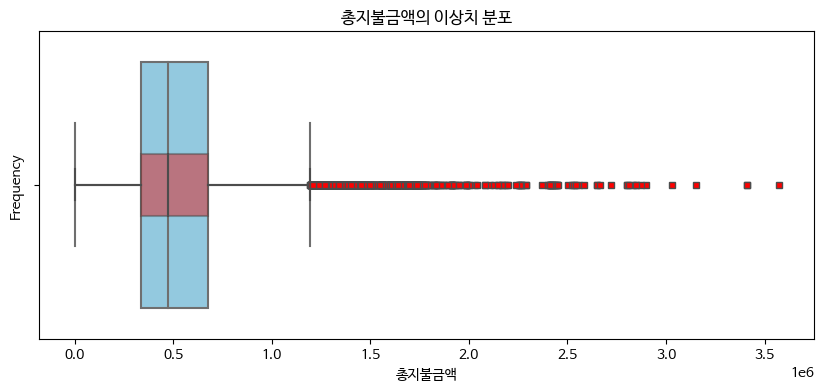

In [25]:
# 이상치 확인
def detect_outliers(feature_name):
    Q1 = data[feature_name].quantile(0.25)
    Q3 = data[feature_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[feature_name] < lower_bound) | (data[feature_name] > upper_bound)]
    return outliers

# 이상치 시각화 함수
def plot_outliers(feature_name):
  plt.figure(figsize=(10, 4))

  sns.boxplot(data=data, x=feature_name, color='skyblue', showfliers=False)
  outliers = detect_outliers(variable)
  print(f'{feature_name}의 이상치 인덱스')
  print(list(outliers.index))
  print('===================')
  sns.boxplot(data=data, x=feature_name, color='red', width=0.2, boxprops=dict(alpha=0.5), flierprops=dict(markerfacecolor='red', marker='s'))
  plt.xlabel(feature_name)
  plt.ylabel('Frequency')
  plt.title(f'{feature_name}의 이상치 분포')
  plt.show()



for variable in variables:
  if data[variable].dtype == 'object':
    continue
  else:
    plot_outliers(variable)



